<h1>Ian Schweer</h1>
<h3>22514022</h3>

/Users/schweer/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


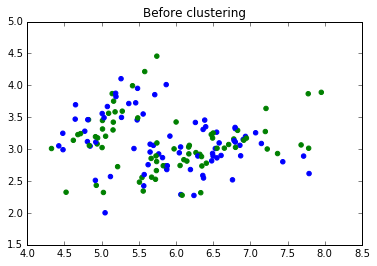

Begin b


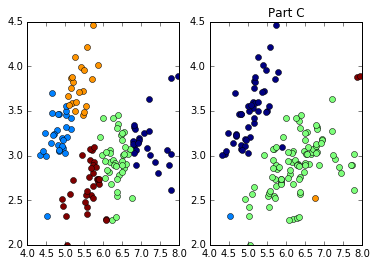

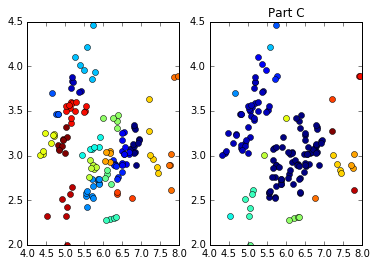

In [1]:
import mltools as ml
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
from mltools import cluster as kmeans
import mltools.transforms
%matplotlib inline

data = np.genfromtxt("data/iris.txt",delimiter=None)
X = data[:,0: -1]
Y = data[:,-1]
plt.title("Before clustering")
plt.scatter(X[:,0], X[:,1], color=["green", "blue"])
plt.show()

print "Begin b"
for _,i in enumerate([5,20]):
    fg,ax = plt.subplots(1,2)
    z,c,sd = kmeans.kmeans(X[:,0:2], i)
    ml.plotClassify2D(None, X[:, 0:2], z, axis=ax[0])
    plt.title("Part B")
    plt.title("Part C")
    z,join = kmeans.agglomerative(X[:,0:2],i,'min')
    ml.plotClassify2D(None, X[:,0:2], z, axis=ax[1])
    plt.show()
    

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml
import scipy.linalg
X = np.genfromtxt("data/faces.txt",delimiter=None)
mu = X.mean(axis=0, keepdims=True)
x0 = X - mu
u,s,v = scipy.linalg.svd(x0, False)
w = u.dot(np.diag(s))
print "u shape",u.shape,", s shape",s.shape,", v shape", v.shape

u shape (4916, 576) , s shape (576,) , v shape (576, 576)


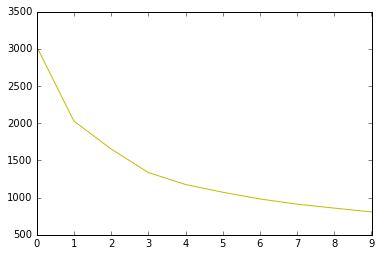

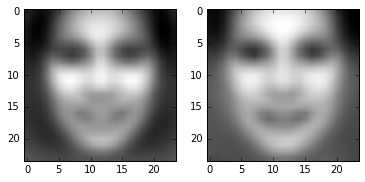

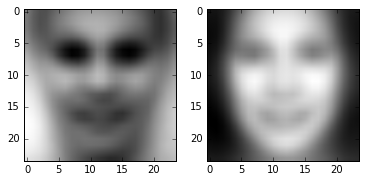

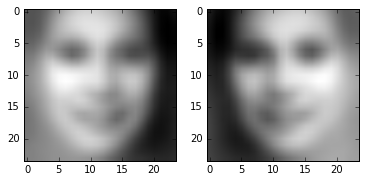

In [3]:
err = np.zeros(10)
m=range(10)
for k in m:
    x0hat = w[:,:k].dot(v[:k,:])
    err[k] = ((x0-x0hat)**2).mean()
plt.plot(m, err, 'y-')

nfaces = 3
for k in range(nfaces):
    alpha = 2 * np.median(np.abs(w[:,k]))
    plt.figure()
    _,axs = plt.subplots(1,2)
    axs[0].imshow(np.reshape(mu+alpha*v[k,:], (24,24)).T, cmap="gray")
    axs[1].imshow(np.reshape(mu-alpha*v[k,:], (24,24)).T, cmap="gray")

2e


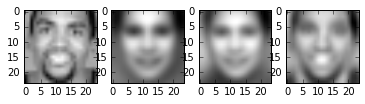

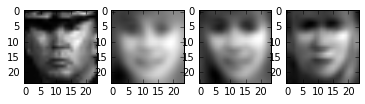

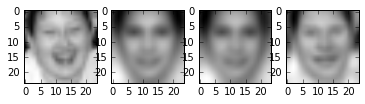

In [4]:
print "2e"
for _,i in enumerate([11*i for i in range(1, 4)]):
    im = np.reshape(X[i,:], (24,24))
    plt.figure()
    f,ax = plt.subplots(1,4)
    ax[0].imshow(im.T, cmap="gray")
    for j,k in enumerate([5,10,50]):
        l = mu + w[i,0:k].dot(v[0:k,:])
        ax[j+1].imshow(np.reshape(l, (24,24)).T, cmap="gray")

2f


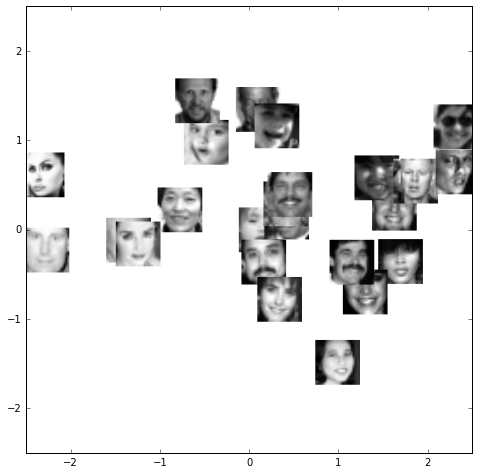

In [10]:
print "2f"

rand=np.floor(4915*np.random.rand(25)).astype("int")
plt.rcParams['figure.figsize'] = (8.,8.)
coord,params = ml.transforms.rescale(w[:,0:2])
for i in rand:
    l = (coord[i,0],coord[i,0] + .5, coord[i,1], coord[i,1]+.5)
    plt.imshow(np.reshape(X[i,:],(24,24)).T, cmap="gray", extent=l)
    plt.axis((-2.5,2.5,-2.5,2.5))